## Import Libraries

In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## Import Data Set

In [9]:
df = pd.read_csv('Dhaka Rent.csv', sep=';')
df.head()

,area,rent
0,2000,31500
1,2100,35000
2,2500,41050
3,2250,36100
4,3000,52100


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   area    60 non-null     int64
 1   rent    60 non-null     int64
dtypes: int64(2)
memory usage: 1.1 KB


In [13]:
df.isnull().sum()

area    0
rent    0
dtype: int64

In [19]:
df.area

0     2000
1     2100
2     2500
3     2250
4     3000
5     1900
6     1500
7     1850
8     2700
9     2100
10    2150
11    2100
12    2100
13    2510
14    2250
15    3100
16    1800
17    1550
18    1800
19    2700
20    2110
21    2100
22    3500
23    1200
24    2800
25    3100
26    2750
27    1800
28    2200
29    3100
30    2100
31    2100
32    2500
33    2250
34    3000
35    1900
36    1500
37    1850
38    2700
39    2100
40    2150
41    2100
42    2100
43    2510
44    2250
45    3100
46    1800
47    1550
48    1800
49    2700
50    2110
51    2100
52    3500
53    1200
54    2800
55    3100
56    2750
57    1800
58    2200
59    3100
Name: area, dtype: int64

In [23]:
df[['area']].head()

,area
0,2000
1,2100
2,2500
3,2250
4,3000


In [25]:
df.tail()

,area,rent
55,3100,54000
56,2750,48500
57,1800,25100
58,2200,31560
59,3100,51600


In [29]:
df.shape

(60, 2)

In [31]:
df.corr()

,area,rent
area,1.000000,0.974807
rent,0.974807,1.000000


Text(0, 0.5, 'RENT')

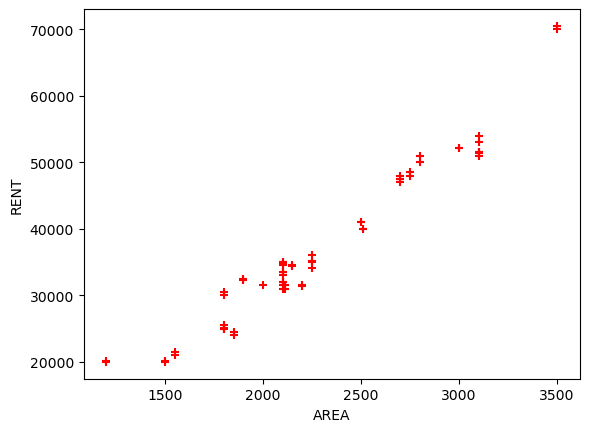

In [37]:
plt.scatter(df.area, df.rent, marker='+', color='red')
plt.xlabel('AREA')
plt.ylabel('RENT')

In [39]:
df.area.mean()

2289.0

In [41]:
df.rent.mean()

37269.166666666664

In [45]:
x = df.drop('rent', axis=1)
x.head()

,area
0,2000
1,2100
2,2500
3,2250
4,3000


In [47]:
y = df.drop('area', axis=1)
y.head()

,rent
0,31500
1,35000
2,41050
3,36100
4,52100


## Linear Regression

In [50]:
from sklearn.linear_model import LinearRegression

In [52]:
reg = LinearRegression()

In [54]:
reg.fit(x,y)

LinearRegression()

In [56]:
reg.coef_

array([[21.29266147]])

In [58]:
reg.intercept_

array([-11469.73544643])

In [60]:
reg.predict([[2000]])

array([[31115.58750079]])

In [64]:
df['predicted'] = reg.predict(x)
df.head()

,area,rent,predicted
0,2000,31500,31115.587501
1,2100,35000,33244.853648
2,2500,41050,41761.918238
3,2250,36100,36438.752869
4,3000,52100,52408.248974


In [66]:
df['residuals'] = df[['rent']] - reg.predict(x)
df.head()

,area,rent,predicted,residuals
0,2000,31500,31115.587501,384.412499
1,2100,35000,33244.853648,1755.146352
2,2500,41050,41761.918238,-711.918238
3,2250,36100,36438.752869,-338.752869
4,3000,52100,52408.248974,-308.248974


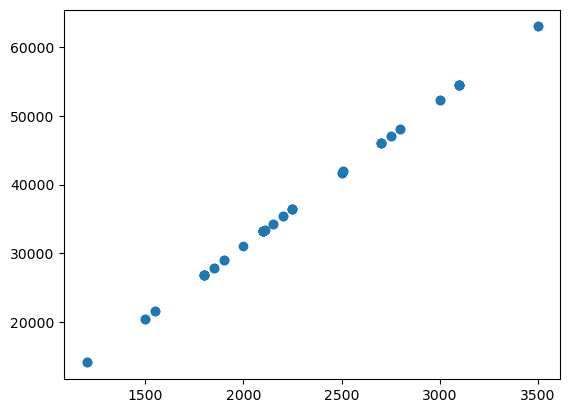

In [70]:
plt.scatter(df.area, df.predicted)

Text(0, 0.5, 'RENT')

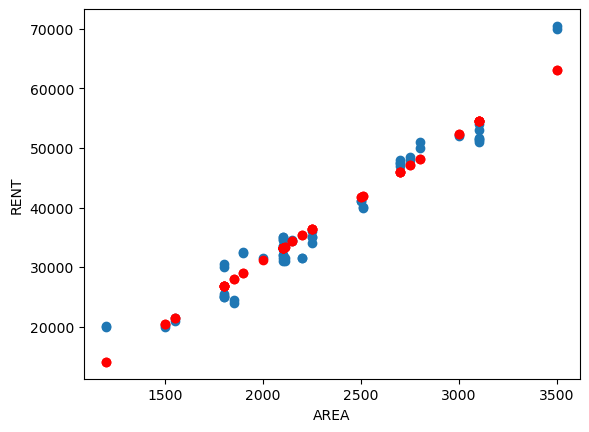

In [72]:
plt.scatter(df.area, df.rent)
plt.scatter(df.area, df.predicted, color='red')
plt.xlabel('AREA')
plt.ylabel('RENT')

Text(0, 0.5, 'RENT')

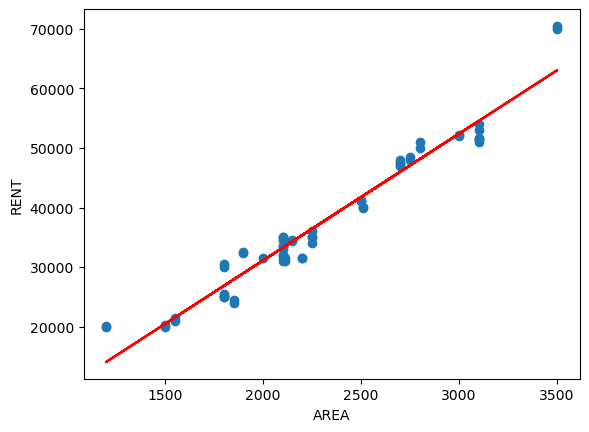

In [74]:
plt.scatter(df.area, df.rent)
plt.plot(df.area, df.predicted, color='red')
plt.xlabel('AREA')
plt.ylabel('RENT')

## MSE

In [77]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [79]:
mse = mean_squared_error(df.rent, df.predicted)
mse

6778077.204095561

In [81]:
import math
math.sqrt(mse)

2603.474064417689